# Representing a Single Distribution (Titanic Data)

Data available at https://www.kaggle.com/datasets/yasserh/titanic-dataset 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_age = df["Age"].dropna()
df_age.head(10)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
Name: Age, dtype: float64

Visualization 1:  the standard histogram

<Axes: xlabel='Age', ylabel='Count'>

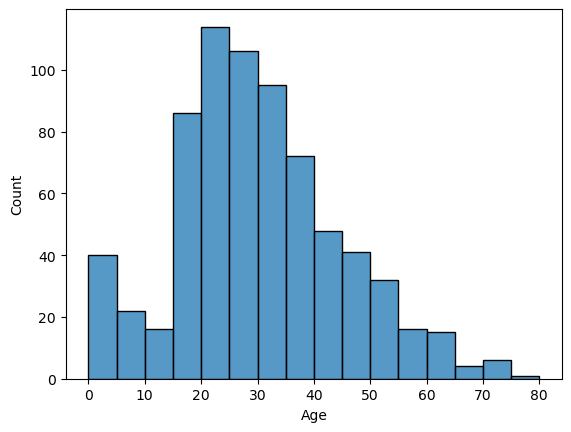

In [16]:
sns.histplot(df_age, bins = range(0, 85, 5))

**Histogram alternative**:  the Wilkinson dot plot
* Similar to a unit chart
* Use bins defined by histogram
* Place one dot per person to represent the count

In [19]:
counts_dict = {}
for i in range(0, 85, 5):
    counts_dict[i] = 0
    
# sort ages into bins
for i in range(len(df_age)):
    a, b, = divmod(df_age.iloc[i], 5)
    counts_dict[a * 5] += 1
    
counts_dict


{0: 40,
 5: 22,
 10: 16,
 15: 86,
 20: 114,
 25: 106,
 30: 95,
 35: 72,
 40: 48,
 45: 41,
 50: 32,
 55: 16,
 60: 15,
 65: 4,
 70: 6,
 75: 0,
 80: 1}

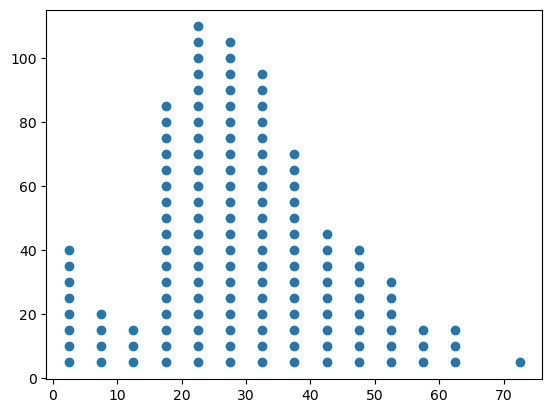

In [26]:
# Construct dot histogram 
x_vals = []
y_vals = []
for i in range(0, 85, 5):
    y_count = 5 # one dot per five people 
    for j in range(counts_dict[i] // 5):
        x_vals.append(i + 2.5) # center the dot in the bin
        y_vals.append(y_count)
        y_count += 5

fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals)

Add bin details

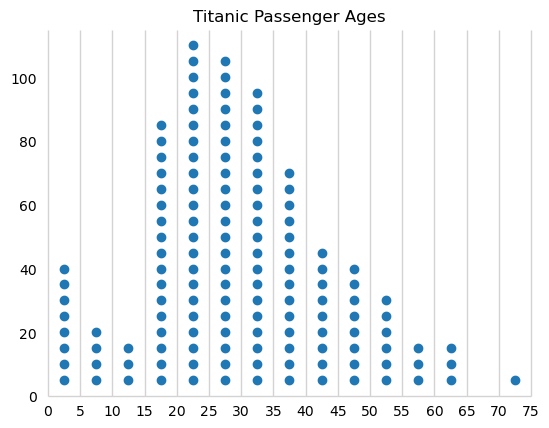

In [44]:
# Construct dot histogram 
x_vals = []
y_vals = []
for i in range(0, 85, 5):
    y_count = 5 # one dot per five people 
    for j in range(counts_dict[i] // 5):
        x_vals.append(i + 2.5) # center the dot in the bin
        y_vals.append(y_count)
        y_count += 5

fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals)
ax.set_xticks(range(0, 80, 5))
ax.hlines(y=0, xmin=0, xmax=75, color="lightgray", linewidth=1)
for i in range(0, 80, 5):
    ax.vlines(x = i, ymin=0, ymax= 115, color="lightgray", linewidth=1)

ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(which="both", length=0)

ax.set_xlim(-1, 76)
ax.set_ylim(-1, 115)

ax.set_title("Titanic Passenger Ages")

plt.show()

To construct the "wheat" plot, we can compute random x values within each interval then sort them:

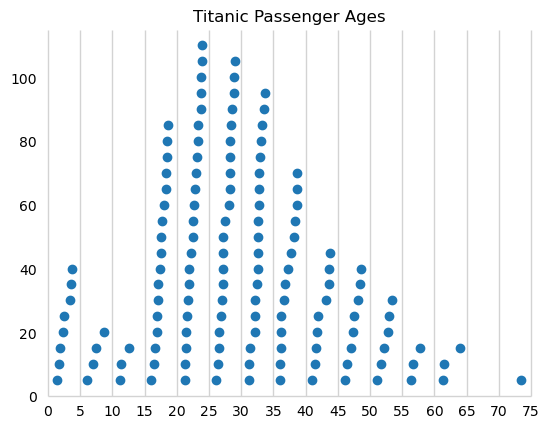

In [50]:
import numpy as np

# Construct dot histogram 
x_vals = []
y_vals = []
for i in range(0, 85, 5):
    y_count = 5 # one dot per five people 
    
    # Jitter the data
    num_samples = counts_dict[i] // 5
    new_x_vals = list(np.random.uniform(i + 1, i + 4, size = num_samples))
    new_x_vals.sort()    
    
    for j in range(counts_dict[i] // 5):
        x_vals.append(new_x_vals.pop(0)) # center the dot in the bin
        y_vals.append(y_count)
        y_count += 5

fig, ax = plt.subplots()
ax.scatter(x_vals, y_vals)
ax.set_xticks(range(0, 80, 5))
ax.hlines(y=0, xmin=0, xmax=75, color="lightgray", linewidth=1)
for i in range(0, 80, 5):
    ax.vlines(x = i, ymin=0, ymax= 115, color="lightgray", linewidth=1)

ax.spines[["left", "right", "top", "bottom"]].set_visible(False)
ax.tick_params(which="both", length=0)

ax.set_xlim(-1, 76)
ax.set_ylim(-1, 115)

ax.set_title("Titanic Passenger Ages")

plt.show()

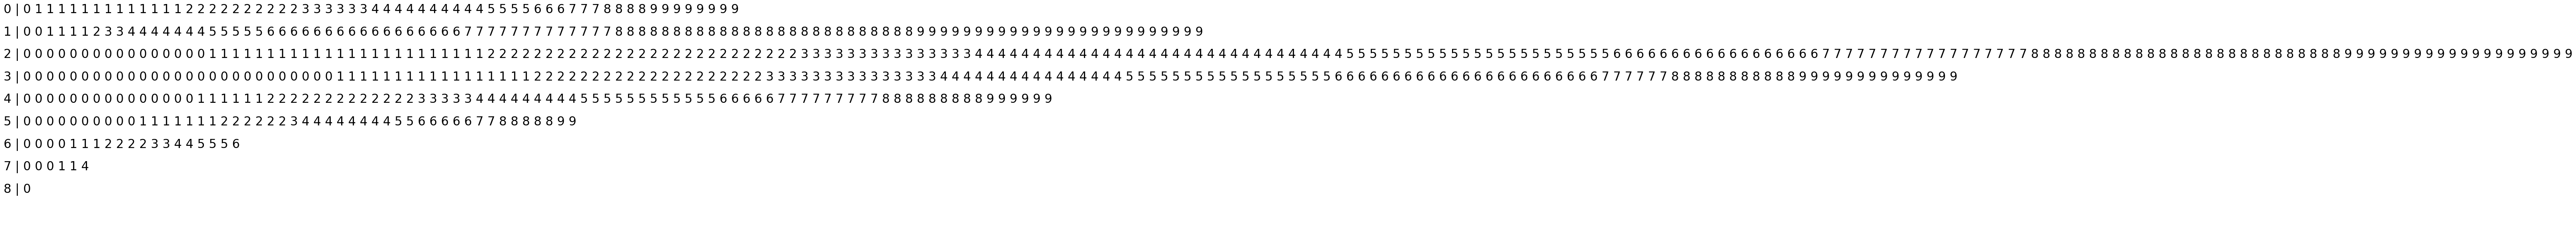

In [205]:
# Stem and leaf plot (function generated with AI)

def stem_leaf_plot(data):
    # Sort the data
    sorted_data = sorted(data)

    # Extract stems and leaves
    stems = [str(x)[:-1] if len(str(x)) > 1 else '0' for x in sorted_data]
    leaves = [str(x)[-1] for x in sorted_data]

    # Create a dictionary to store leaves for each stem
    stem_leaf_dict = {}
    for stem, leaf in zip(stems, leaves):
        stem_leaf_dict.setdefault(stem, []).append(leaf)

    # Plot the stem-leaf plot
    fig, ax = plt.subplots(figsize=(20, 8))
    y = len(stem_leaf_dict) // 5
    
    
    for stem, leaves in stem_leaf_dict.items():
        ax.text(0, y, f"{stem} | {' '.join(leaves)}", fontsize=24)
        y -= 0.1
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.show()
    
data = list(df_age)
data = [int(round(x)) for x in data]


stem_leaf_plot(data)

In [323]:
# Print the numbers

vals = list(df_age)
vals = [int(x) for x in vals]
vals

[22,
 38,
 26,
 35,
 35,
 54,
 2,
 27,
 14,
 4,
 58,
 20,
 39,
 14,
 55,
 2,
 31,
 35,
 34,
 15,
 28,
 8,
 38,
 19,
 40,
 66,
 28,
 42,
 21,
 18,
 14,
 40,
 27,
 3,
 19,
 18,
 7,
 21,
 49,
 29,
 65,
 21,
 28,
 5,
 11,
 22,
 38,
 45,
 4,
 29,
 19,
 17,
 26,
 32,
 16,
 21,
 26,
 32,
 25,
 0,
 30,
 22,
 29,
 28,
 17,
 33,
 16,
 23,
 24,
 29,
 20,
 46,
 26,
 59,
 71,
 23,
 34,
 34,
 28,
 21,
 33,
 37,
 28,
 21,
 38,
 47,
 14,
 22,
 20,
 17,
 21,
 70,
 29,
 24,
 2,
 21,
 32,
 32,
 54,
 12,
 24,
 45,
 33,
 20,
 47,
 29,
 25,
 23,
 19,
 37,
 16,
 24,
 22,
 24,
 19,
 18,
 19,
 27,
 9,
 36,
 42,
 51,
 22,
 55,
 40,
 51,
 16,
 30,
 44,
 40,
 26,
 17,
 1,
 9,
 45,
 28,
 61,
 4,
 1,
 21,
 56,
 18,
 50,
 30,
 36,
 9,
 1,
 4,
 45,
 40,
 36,
 32,
 19,
 19,
 3,
 44,
 58,
 42,
 24,
 28,
 34,
 45,
 18,
 2,
 32,
 26,
 16,
 40,
 24,
 35,
 22,
 30,
 31,
 27,
 42,
 32,
 30,
 16,
 27,
 51,
 38,
 22,
 19,
 20,
 18,
 35,
 29,
 59,
 5,
 24,
 44,
 8,
 19,
 33,
 29,
 22,
 30,
 44,
 25,
 24,
 37,
 54,
 29,
 62,
 3

### Visualization 2:  the density curve

(0.0, 80.0)

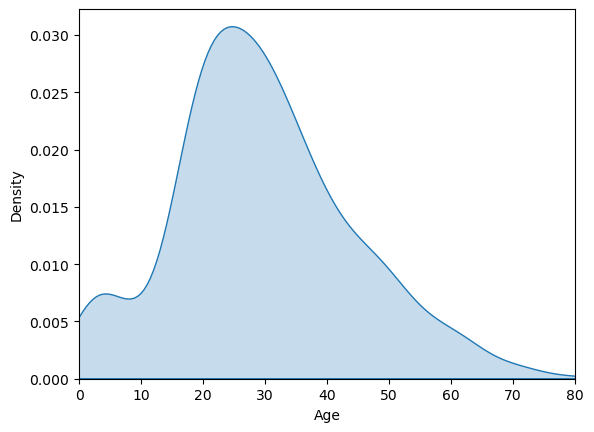

In [12]:
ax = sns.kdeplot(df_age, fill=True)
ax.set_xlim(0, df_age.max())

(0.0, 80.0)

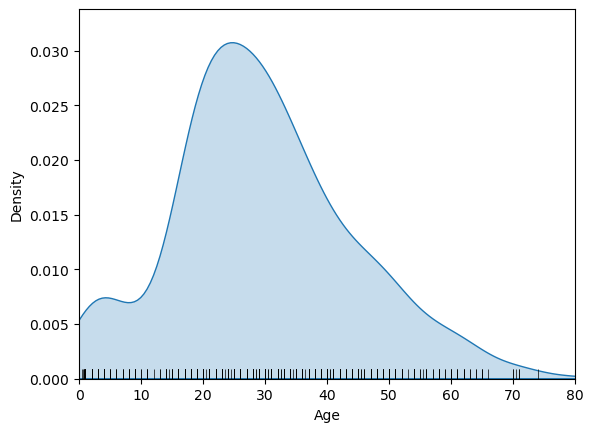

In [54]:
# Density with rugplot

ax = sns.kdeplot(df_age, fill=True)
sns.rugplot(df_age, ax = ax, color="black", linewidth=0.5)
ax.set_xlim(0, df_age.max())

<Axes: ylabel='Age'>

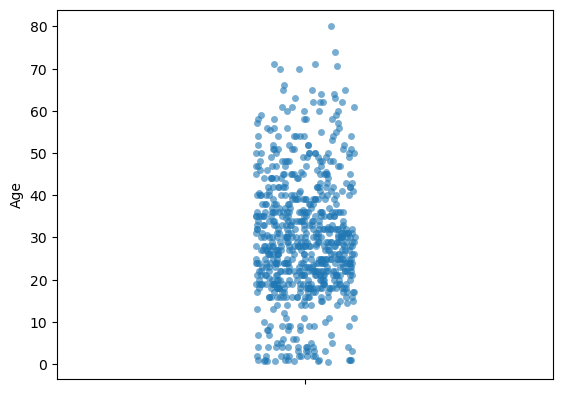

In [57]:
# Strip plot

sns.stripplot(df_age, alpha=0.6)

<Axes: ylabel='Age'>

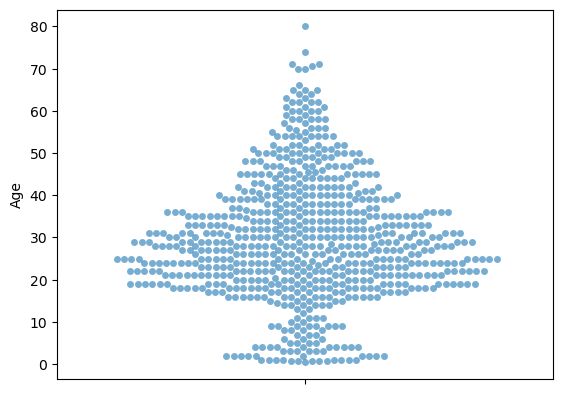

In [324]:
# Strip plot

sns.swarmplot(df_age, alpha=0.6)

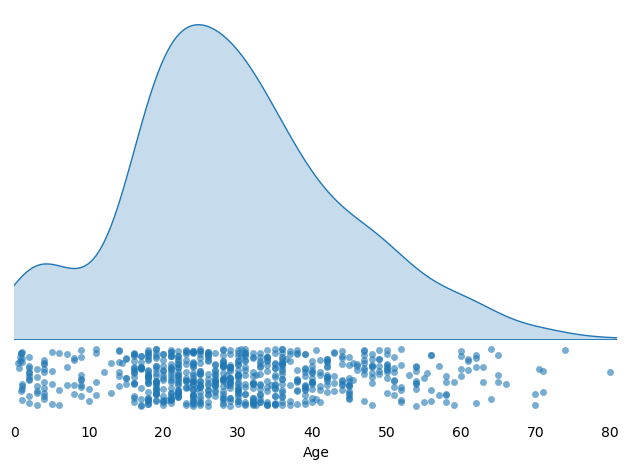

In [104]:
# Rain cloud

fig, axs = plt.subplots(2, 1)
sns.stripplot(x = df_age, alpha=0.6, ax = axs[1], color="tab:blue")
sns.kdeplot(df_age, fill=True, ax = axs[0])

for ax in axs:
    ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
    ax.set_xlim(0, df_age.max() + 1)
    ax.set_yticks([])
    ax.set_ylabel("")
    ax.tick_params(axis="both", length = 0)
axs[0].set_xticks([])
axs[0].set_xlabel("")
axs[1].set_ylim(-0.15, 1)
axs[1].zorder = -10


plt.tight_layout(h_pad=-18)
plt.show()

**Alternatives**:  the violin plot
*  https://seaborn.pydata.org/generated/seaborn.violinplot.html 

<Axes: >

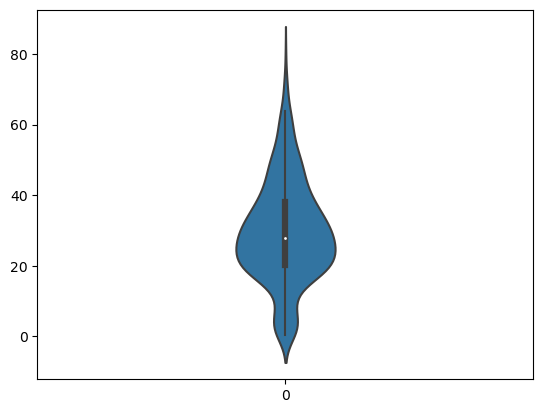

In [132]:
sns.violinplot(df_age, width = 0.2)

<Axes: >

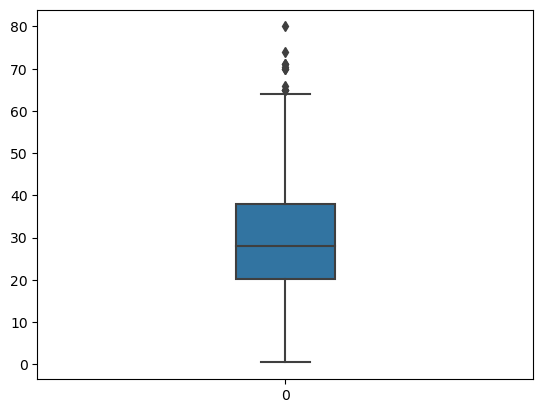

In [131]:
# Box plot -- https://seaborn.pydata.org/generated/seaborn.boxplot.html 

sns.boxplot(df_age, width = 0.2)

### Visualizing Multiple Distributions

Task 1:  Show age distribution by passenger class

In [133]:
# Get dataframe
df.dropna(subset="Age", inplace=True)

<Axes: xlabel='Age', ylabel='Density'>

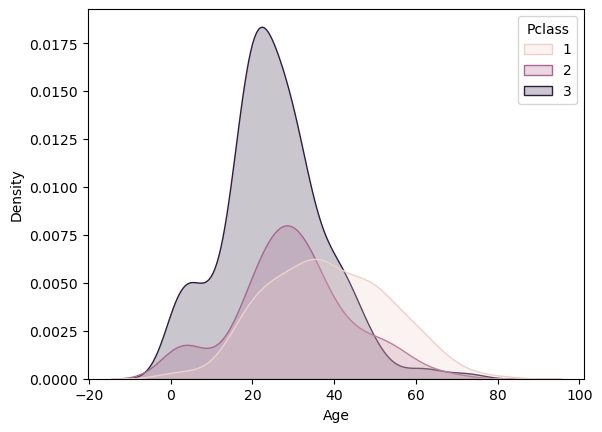

In [139]:
# Multiple density curves, same plot

fig, ax = plt.subplots()
sns.kdeplot(data = df, x = "Age", hue = "Pclass", fill=True)


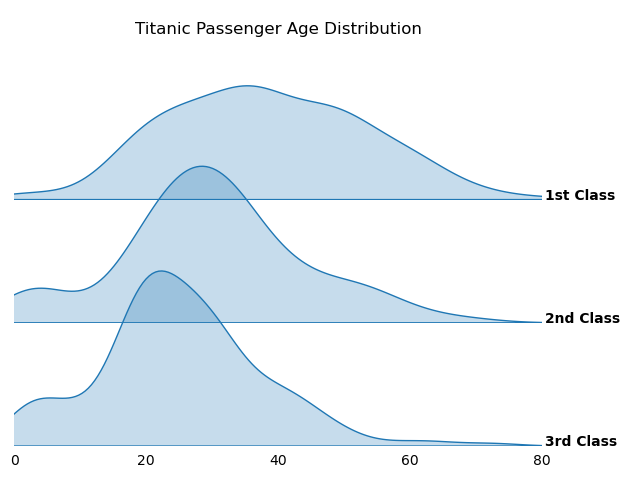

In [167]:
# Ridge plot 

fig, axs = plt.subplots(3, 1)
suffixes = ["st", "nd", "rd"]

for i in range(3):
    sns.kdeplot(data = df[df["Pclass"] == i + 1], x="Age", fill=True, ax=axs[i])
    axs[i].set_ylim(0, 0.04)
    axs[i].set_xlim(0, 80)
    axs[i].set_axis_off()
    axs[i].text(80.5, 0, f"{i + 1}{suffixes[i]} Class", fontweight="bold")
    
for i in range(0, 81, 20):
    axs[-1].text(i, -0.004, str(i), ha="center")

    
axs[0].text(40, 0.035, "Titanic Passenger Age Distribution", fontsize=12, ha="center")
plt.tight_layout(h_pad=-5)

Show the averages with error bars

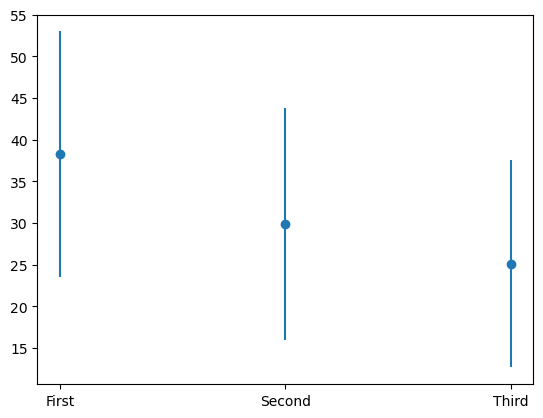

In [181]:
class_dict = {1: [], 2: [], 3:[]}
for i in range(len(df)):
    class_dict[df["Pclass"].iloc[i]].append(df["Age"].iloc[i])
fig, ax = plt.subplots()
#ax.scatter([0, 1, 2], [np.mean(class_dict[i]) for i in range(1, 4)])
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["First", "Second", "Third"])
ax.errorbar([0, 1, 2], [np.mean(class_dict[i]) for i in range(1, 4)], [np.std(class_dict[i]) for i in range(1, 4)], marker="o", linestyle="")

    
plt.show()



Show the data values (could include errorbars):

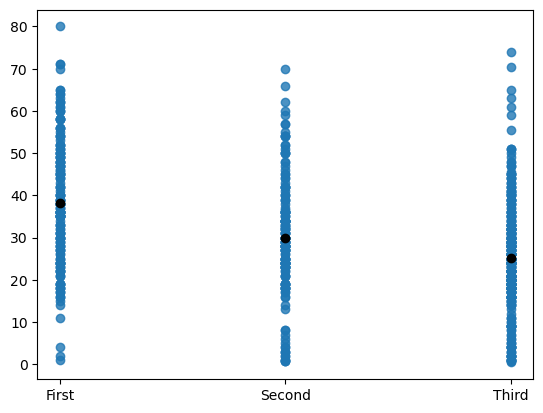

In [187]:
class_dict = {1: [], 2: [], 3:[]}
for i in range(len(df)):
    class_dict[df["Pclass"].iloc[i]].append(df["Age"].iloc[i])
fig, ax = plt.subplots()
x_vals = []
for i in range(1, 4):
    x_vals += [i-1] * len(class_dict[i])

ax.scatter(x_vals, class_dict[1] + class_dict[2] + class_dict[3], alpha=0.8)
ax.scatter([0, 1, 2], [np.mean(class_dict[i]) for i in range(1, 4)], color="black")
# ax.errorbar([0, 1, 2], [np.mean(class_dict[i]) for i in range(1, 4)], [np.std(class_dict[i]) for i in range(1, 4)], marker="o", color="black", linestyle="")


ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["First", "Second", "Third"])

    
plt.show()



Strip plots:

<Axes: xlabel='Pclass', ylabel='Age'>

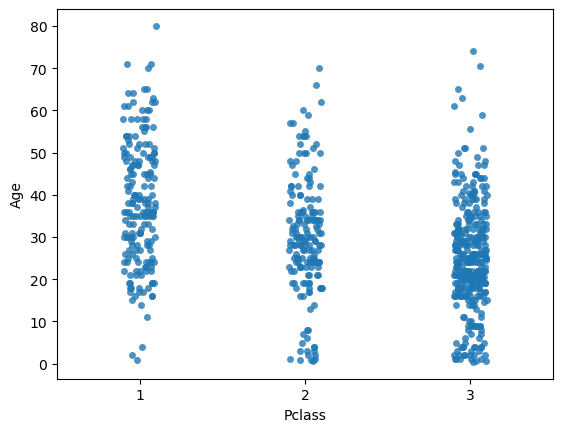

In [196]:
sns.stripplot(data=df, y="Age", x="Pclass", alpha = 0.8)


<Axes: xlabel='Pclass', ylabel='Age'>

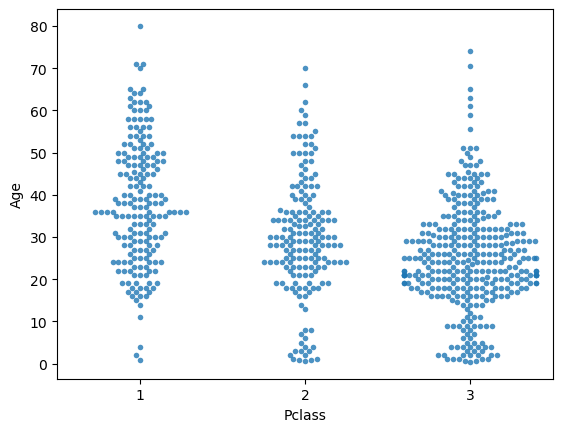

In [195]:
# Swarm plot

sns.swarmplot(data=df, y="Age", x="Pclass", alpha=0.8, s = 4)


<Axes: xlabel='Pclass', ylabel='Age'>

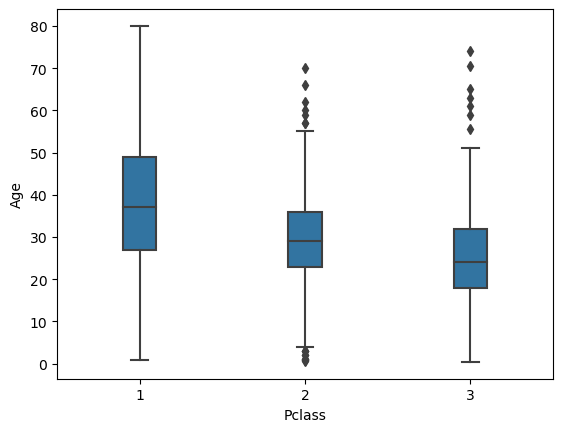

In [234]:
# Box plots

sns.boxplot(data=df, y="Age", x="Pclass", width = 0.2, color="tab:blue")


<Axes: xlabel='Pclass', ylabel='Age'>

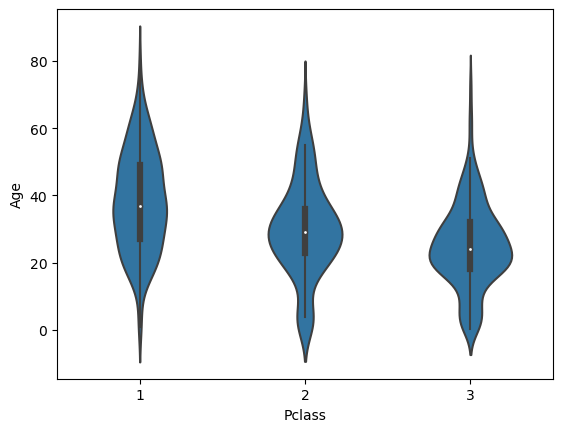

In [327]:
# Violin plots

sns.violinplot(data=df, y="Age", x="Pclass", width = 0.5, color="tab:blue")


### Show multiple data values

Age distribution, showing male and female passengers:

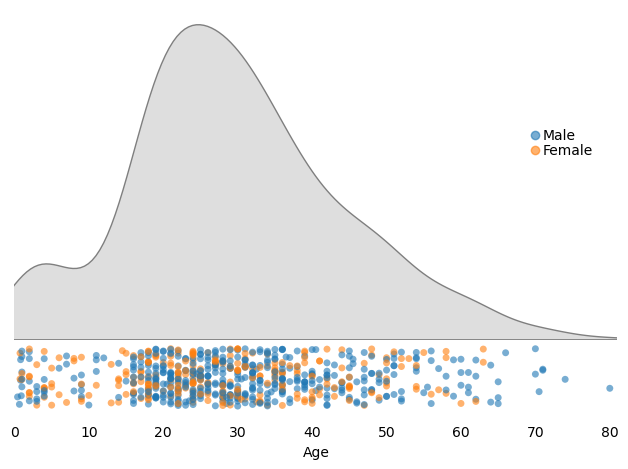

In [228]:
# Rain cloud

fig, axs = plt.subplots(2, 1)
sns.stripplot(data = df, x = "Age", alpha=0.6, ax = axs[1], hue="Sex")
sns.kdeplot(df_age, fill=True, ax = axs[0], color="tab:gray")

for ax in axs:
    ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
    ax.set_xlim(0, df_age.max() + 1)
    ax.set_yticks([])
    ax.set_ylabel("")
    ax.tick_params(axis="both", length = 0)
axs[0].set_xticks([])
axs[0].set_xlabel("")
axs[1].set_ylim(-0.15, 1)
axs[1].zorder = -10

# Legend
axs[0].scatter(70, 0.02, marker="o", color="tab:blue", alpha=0.6)
axs[0].text(71, 0.02, "Male", va="center")
axs[0].scatter(70, 0.0185, marker="o", color="tab:orange", alpha=0.6)
axs[0].text(71, 0.0185, "Female", va="center")


plt.tight_layout(h_pad=-18)
plt.show()

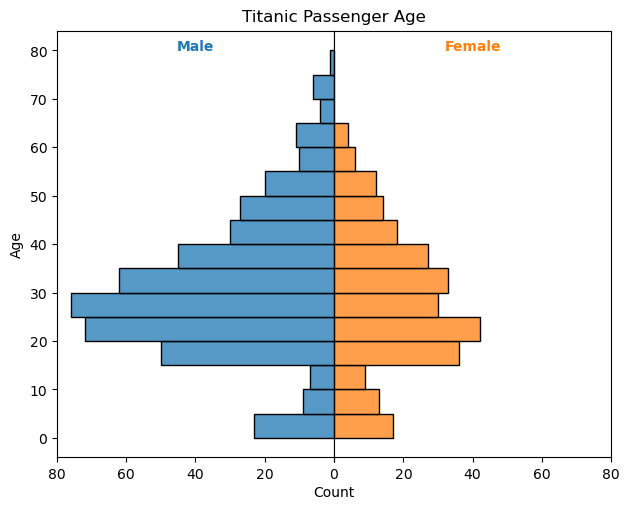

In [318]:
fig, axs = plt.subplots(1, 2)

sns.histplot(data = df[df["Sex"] == "male"], y = "Age", bins = range(0, 85, 5), ax = axs[0], label="Male", legend=True)
sns.histplot(data = df[df["Sex"] == "female"], y = "Age", bins = range(0, 85, 5), ax = axs[1], color="tab:orange")

for i in range(2):
    axs[i].set_xlim(0, 80)
    axs[i].set_xlabel("")



axs[0].invert_xaxis()


axs[1].set_ylabel("")
axs[1].set_yticks([])
axs[1].set_xticks(list(range(0, 81, 20)))
axs[1].set_xticklabels(["", "20", "40", "60" , "80"])

plt.tight_layout(w_pad=-0.3)

axs[0].text(0, 86, "Titanic Passenger Age", ha="center", fontsize=12)
axs[0].text(0, -12, "Count", ha="center")

axs[0].text(40, 80, "Male", ha="center", fontsize=10, fontweight="bold", color="tab:blue")
axs[1].text(40, 80, "Female", ha="center", fontsize=10, fontweight="bold", color="tab:orange")

plt.show()


<Axes: xlabel='Age', ylabel='Density'>

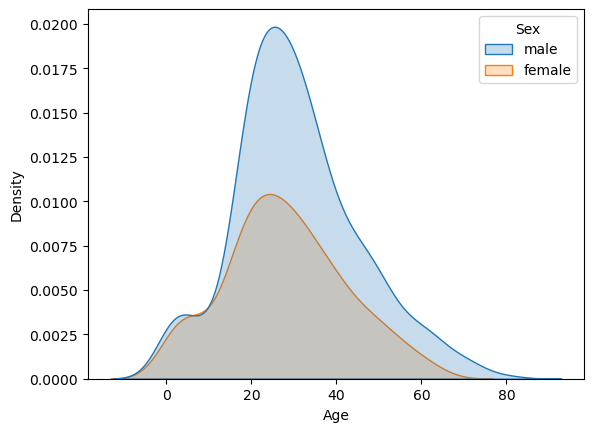

In [325]:
sns.kdeplot(data = df, x = "Age", hue = "Sex", fill=True)

<Axes: ylabel='Age'>

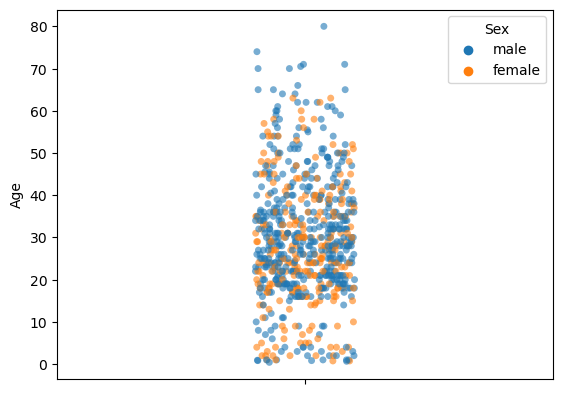

In [332]:
sns.stripplot(data = df, y = "Age", alpha=0.6, hue="Sex")


<Axes: ylabel='Age'>

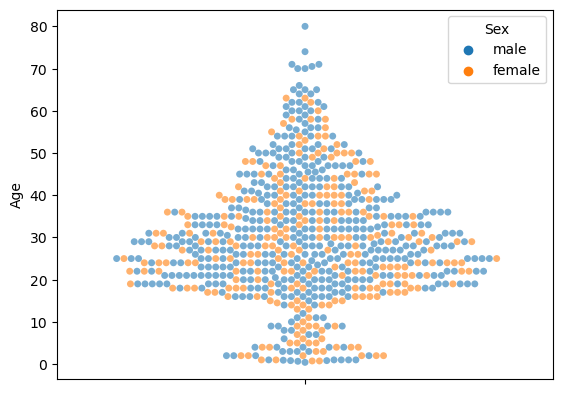

In [333]:
sns.swarmplot(data = df, y = "Age", alpha=0.6, hue="Sex")


<Axes: xlabel='Sex', ylabel='Age'>

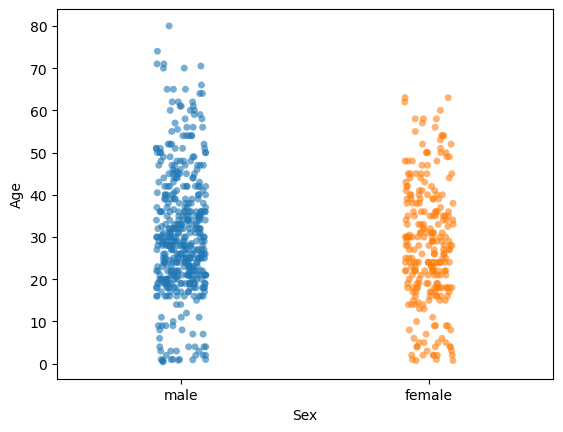

In [342]:
sns.stripplot(data = df, y = "Age", alpha=0.6, x="Sex", hue="Sex", legend=False)

<Axes: xlabel='Sex', ylabel='Age'>

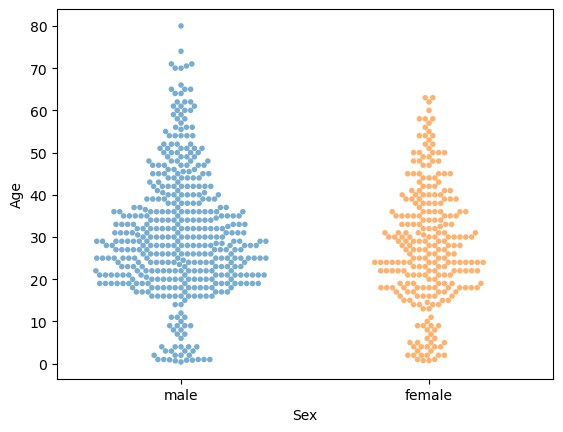

In [344]:
sns.swarmplot(data = df, y = "Age", alpha=0.6, x="Sex", hue="Sex", legend=False, s=4)

<Axes: xlabel='Sex', ylabel='Age'>

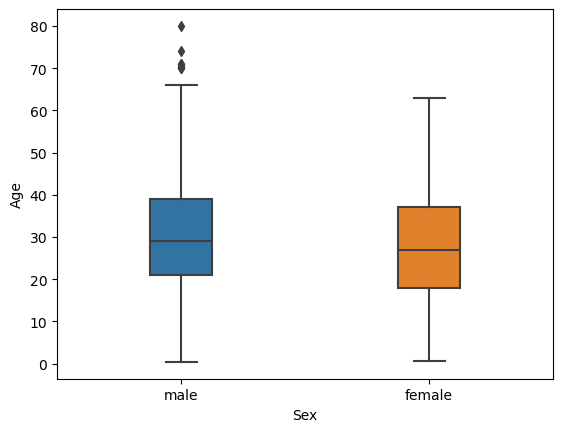

In [337]:
sns.boxplot(data=df, y="Age", x="Sex", width = 0.25)

<Axes: xlabel='Sex', ylabel='Age'>

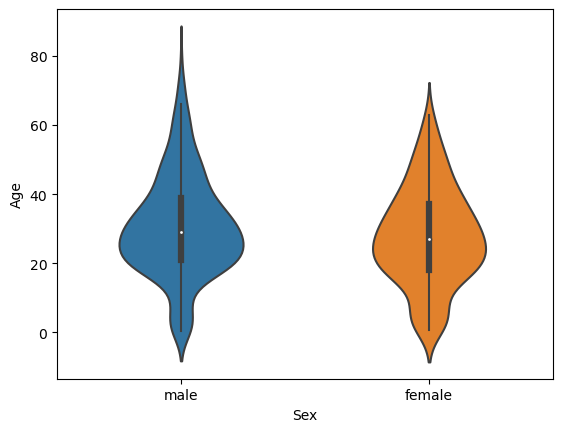

In [339]:
sns.violinplot(data=df, y="Age", x="Sex", width = 0.5)

Add in passenger class:

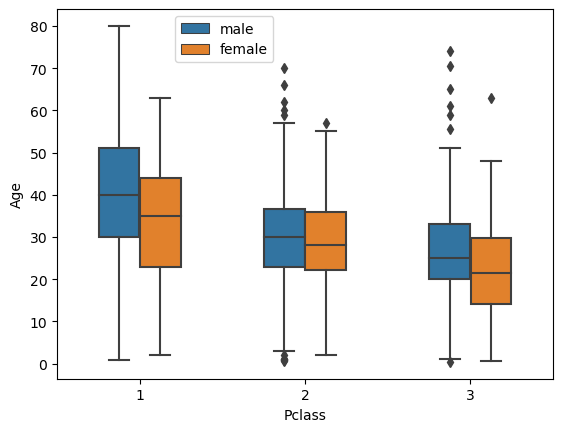

In [223]:
ax = sns.boxplot(data=df, y="Age", x="Pclass", hue="Sex", width = 0.5)
ax.legend(bbox_to_anchor=(0.45, 1))

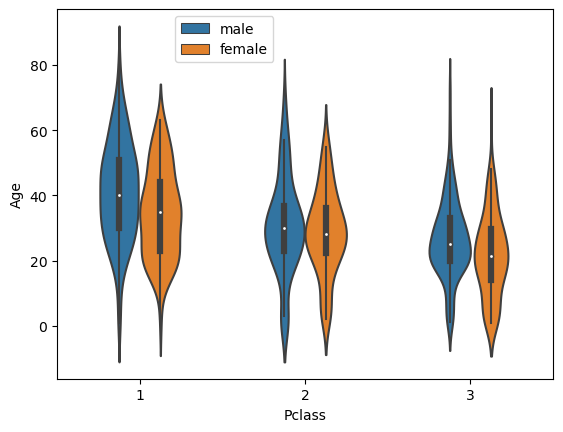

In [222]:
ax = sns.violinplot(data=df, y="Age", x="Pclass", hue="Sex", width = 0.5)
ax.legend(bbox_to_anchor=(0.45, 1))

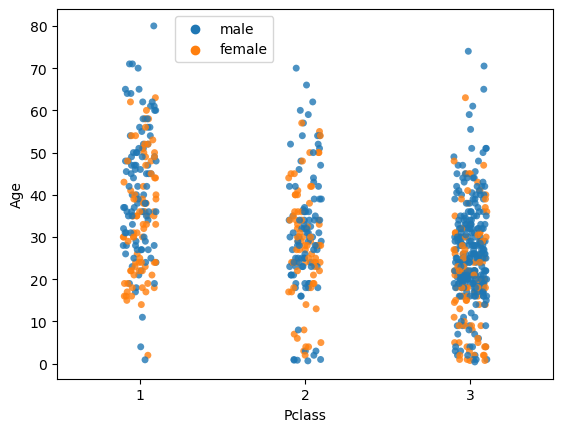

In [236]:
ax = sns.stripplot(data=df, y="Age", x="Pclass", hue ="Sex", alpha = 0.8, hue_order=["male", "female"])
ax.legend(bbox_to_anchor=(0.45, 1))

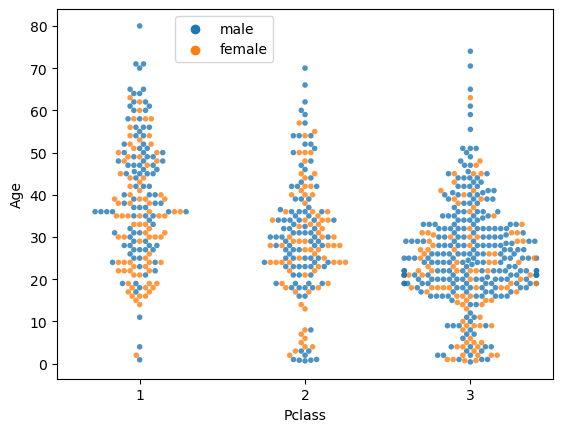

In [238]:
ax = sns.swarmplot(data=df, y="Age", x="Pclass", hue ="Sex", alpha = 0.8, hue_order=["male", "female"], s = 4)
ax.legend(bbox_to_anchor=(0.45, 1))

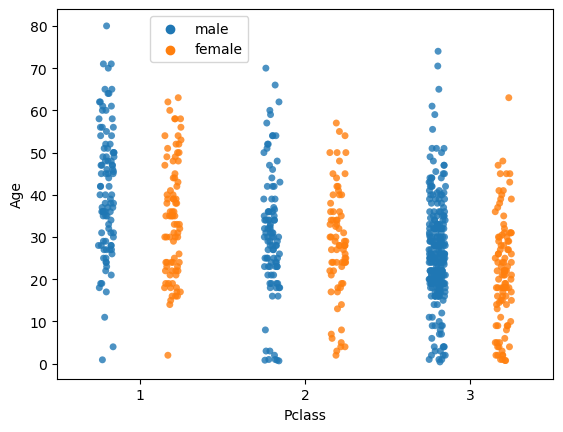

In [368]:
ax = sns.stripplot(data=df, y="Age", x="Pclass", hue ="Sex", alpha = 0.8, hue_order=["male", "female"], dodge=True)
ax.legend(bbox_to_anchor=(0.4, 1))

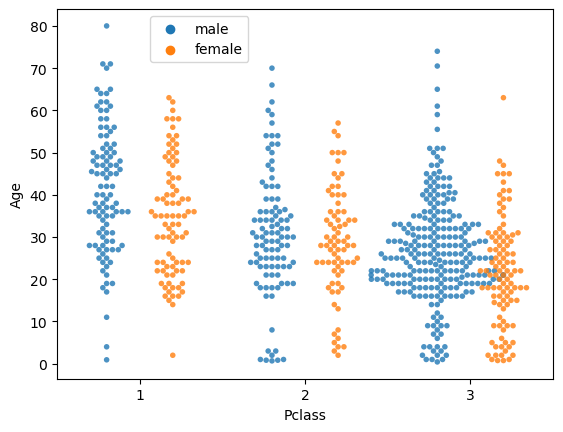

In [370]:
ax = sns.swarmplot(data=df, y="Age", x="Pclass", hue ="Sex", alpha = 0.8, hue_order=["male", "female"], s = 4, dodge=True)
ax.legend(bbox_to_anchor=(0.4, 1))

### Showing Fare Prices

In [345]:
print(df["Fare"].min(), df["Fare"].max(), df["Fare"].mean(), df["Fare"].median())

0.0 512.3292 34.694514005602244 15.7417


<Axes: xlabel='Fare', ylabel='Density'>

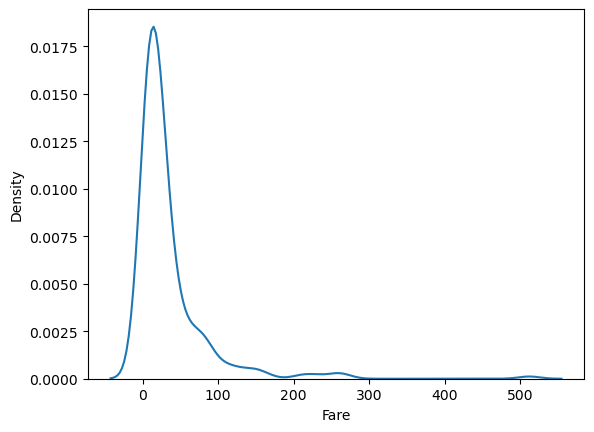

In [346]:
sns.kdeplot(data = df, x = "Fare")

In [347]:
def calc_size(x):
    return 1 + (x / 512.3292) * 50
df["sizes"] = df["Fare"].apply(calc_size)

(-0.5, 0.5)

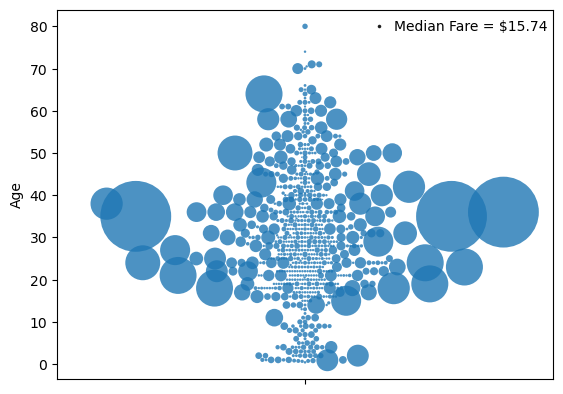

In [362]:
ax = sns.swarmplot(data = df, y = "Age", s = df["sizes"], alpha = 0.8)

ax.scatter(0.15, 80, color="black", alpha=0.8, s = calc_size(15.7417))
ax.text(0.18, 80, "Median Fare = $15.74", va="center")
ax.set_xlim(-0.5, 0.5)
plt.show()

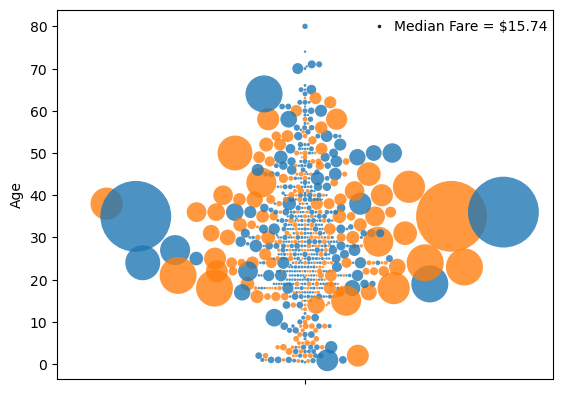

In [363]:
ax = sns.swarmplot(data = df, y = "Age", s = df["sizes"], alpha = 0.8, hue="Sex", legend=False)

ax.scatter(0.15, 80, color="black", alpha=0.8, s = calc_size(15.7417))
ax.text(0.18, 80, "Median Fare = $15.74", va="center")
ax.set_xlim(-0.5, 0.5)
plt.show()

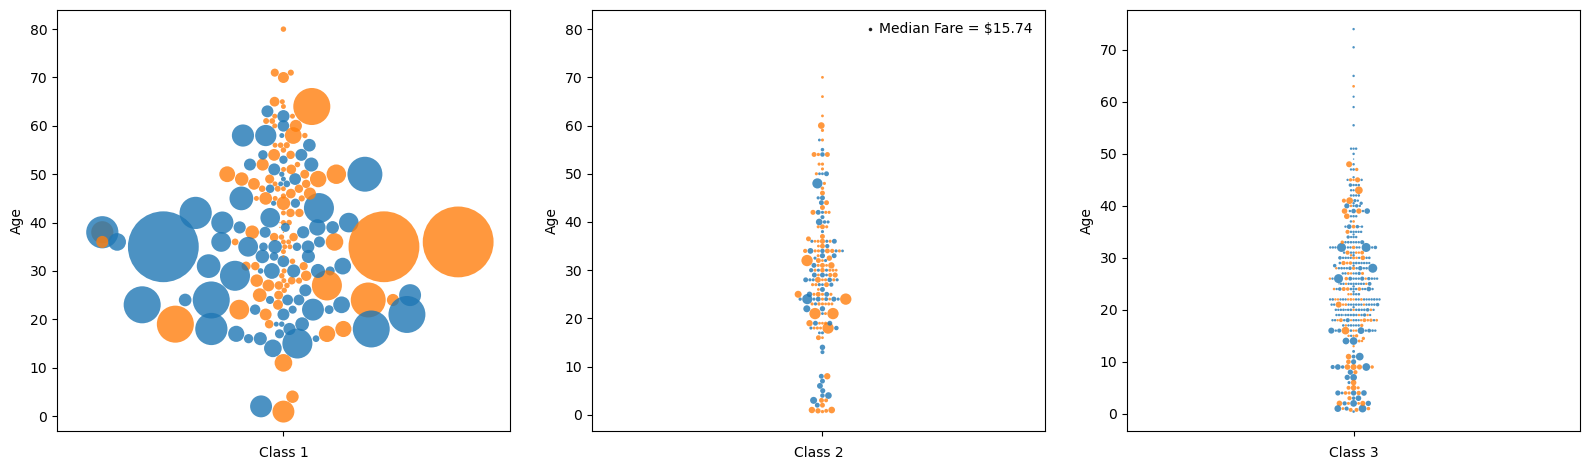

In [379]:
# Fare by passenger class 

fig, axs = plt.subplots(1, 3, figsize=(16, 4.8))
for i in range(3):
    sns.swarmplot(data = df[df["Pclass"] == i+1], y = "Age", s = df[df["Pclass"] == i+1]["sizes"], alpha = 0.8, hue="Sex", legend=False, ax=axs[i])
    axs[i].set_xlabel(f"Class {i+1}")
axs[1].scatter(0.015, 80, color="black", alpha=0.8, s = calc_size(15.7417))
axs[1].text(0.018, 80, "Median Fare = $15.74", va="center")    
    
    
plt.tight_layout()
plt.show()


